In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import csv

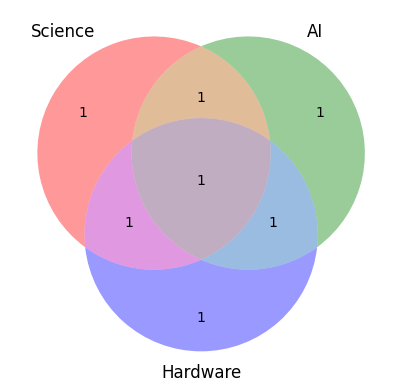

In [5]:
lScience={0,1,2,3}
lAI={-1,2,3,4}
lHardware={-2,3,4,1}
venn3([lScience, lAI,lHardware],('Science','AI','Hardware'))

[0.] [0.6]


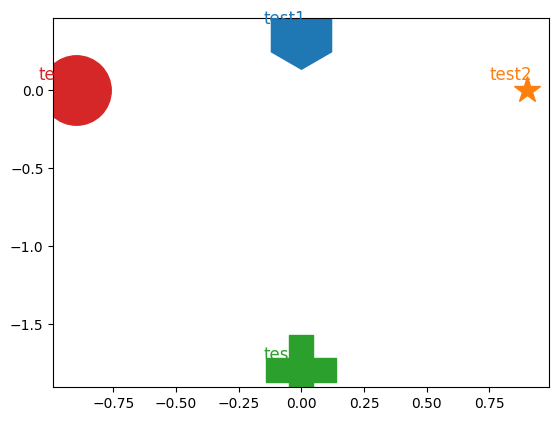

In [19]:
def convertXY(iScience,iAI,iHardware):
    #ensure they sum up to 1
    total=iScience+iAI+iHardware
    pAI       = iAI/total
    pHardware = iHardware/total
    pScience  = iScience/total
    #Barycentric to caresian conversion
    lX0,lY0=0,-1.8
    lX1,lY1=1.8,1.8
    lX2,lY2=-1.8,1.8
    pX=pAI*lX0+pHardware*lX1+pScience*lX2
    pY=pAI*lY0+pHardware*lY1+pScience*lY2
    return np.array([pX]),np.array([pY])

xtest,ytest=convertXY(1./3.,1./3.,1./3.)
print(xtest,ytest)

def plotProject(iProject):
    lX,lY = convertXY(iProject[0],iProject[1],iProject[2])
    markertype='O'
    if iProject[-1] == "HEP":
        markertype='P'
    elif iProject[-1] == "MMA":
        markertype='*'
    elif iProject[-1] == "Neuro":
        markertype='h'
    else:
        markertype='o'    
    p = plt.plot(lX,lY,marker=markertype,markersize=30*(iProject[4]/6))
    lColor = p[0].get_color()
    plt.text(lX[0]-0.15,lY[0]+0.07,iProject[3],fontsize=12,c=lColor)#,rotation=rotation)
    
test1=[0.3,0.4,0.3,'test1',10,'Neuro']
test2=[0.,0.5,0.5,'test2',4,'MMA']
test3=[0.,1.0,0.0,'test3',10,'HEP']
test4=[0.5,0.5,0.,'test4',10,'HAC']
tests=[test1,test2,test3,test4]
for pTest in tests:
    plotProject(pTest)
plt.show()

In [20]:
#Projects
sPVCNN   = [0.4,0.4,0.2,"sPVCNN",8,"HEP"]#Science, AI, Hardware, 8 people
l1btag   = [0.25,0.15,0.6,"NN L1 B-tag",5,"HEP"]#Science, AI, Hardware, 5 people 
ligoAnom = [0.35,0.55,0.1,"LIGO Anom",8,"MMA"]#Science, AI, Hardware, 8 people 
projects=[sPVCNN,l1btag,ligoAnom]

In [83]:
def plot(projets):
    c0=plt.Circle((0,0.75),2.35,color='yellow',fill=False,lw=20)
    c1=plt.Circle((-1, 1), 1.2, color='blue',alpha=0.3)
    c2=plt.Circle(( 1, 1), 1.2, color='red',alpha=0.3)
    c3=plt.Circle(( 0, 0), 1.2, color='g', clip_on=False,alpha=0.3)
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_xscale('asinh')
    ax.set_yscale('asinh')
    ax.add_patch(c0)
    ax.add_patch(c1)
    ax.add_patch(c2)
    ax.add_patch(c3)
    for pProject in projects:
        plotProject(pProject)
    plt.text(-0.4,2.25,"A3D3",fontsize=50,color='purple')
    plt.arrow(-2.35,0.75,0.0,-0.1,shape='full',width=0.12,color='yellow')
    plt.text(-1.65,1.75,"Scientific Applications",fontsize=20)
    plt.text(0.3,1.75,"Computing Hardware",fontsize=20)
    plt.text(-0.3,-0.75,"AI Algorithms",fontsize=20)
    plt.xlim(-3.0,3.0)
    plt.ylim(-2.5,3.5)
    plt.show()

In [81]:
projects=[]
with open('A3D3_collab.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:#[0.4,0.4,0.2,"sPVCNN",8,"HEP"]
            projects.append([float(row[1]),float(row[2]),float(row[3]),row[0],float(row[4]),row[5]])

def adjust(projects):
    #check for duplicates and move
    for i0,pProject in enumerate(projects):
        lX,lY = convertXY(pProject[0],pProject[1],pProject[2])
        for i1 in range(i0-1):
            pX,pY = convertXY(projects[i1][0],projects[i1][1],projects[i1][2])            
            if (projects[i1][0] == pProject[0] and  projects[i1][1] == pProject[1] and projects[i1][2] == pProject[2]):
                pProject[0]-=0.02#np.random.uniform(-1,1)*0.1
                #pProject[1]+=np.random.uniform(-1,1)*0.1
                #pProject[2]+=np.random.uniform(-1,1)*0.1
            lX,lY = convertXY(pProject[0],pProject[1],pProject[2])
            if (abs(pY-lY) < 0.05):
                pProject[0]+=0.02#np.random.uniform(0,1)*0.05
                #pProject[1]+=np.random.uniform(0,1)*0.05
                #pProject[2]+=np.random.uniform(0,1)*0.05  
            lX,lY = convertXY(pProject[0],pProject[1],pProject[2])
            #if (abs(pX-lX) < 0.05):
            #    pProject[2]+=0.1#np.random.uniform(0,1)*0.05
            
adjust(projects)


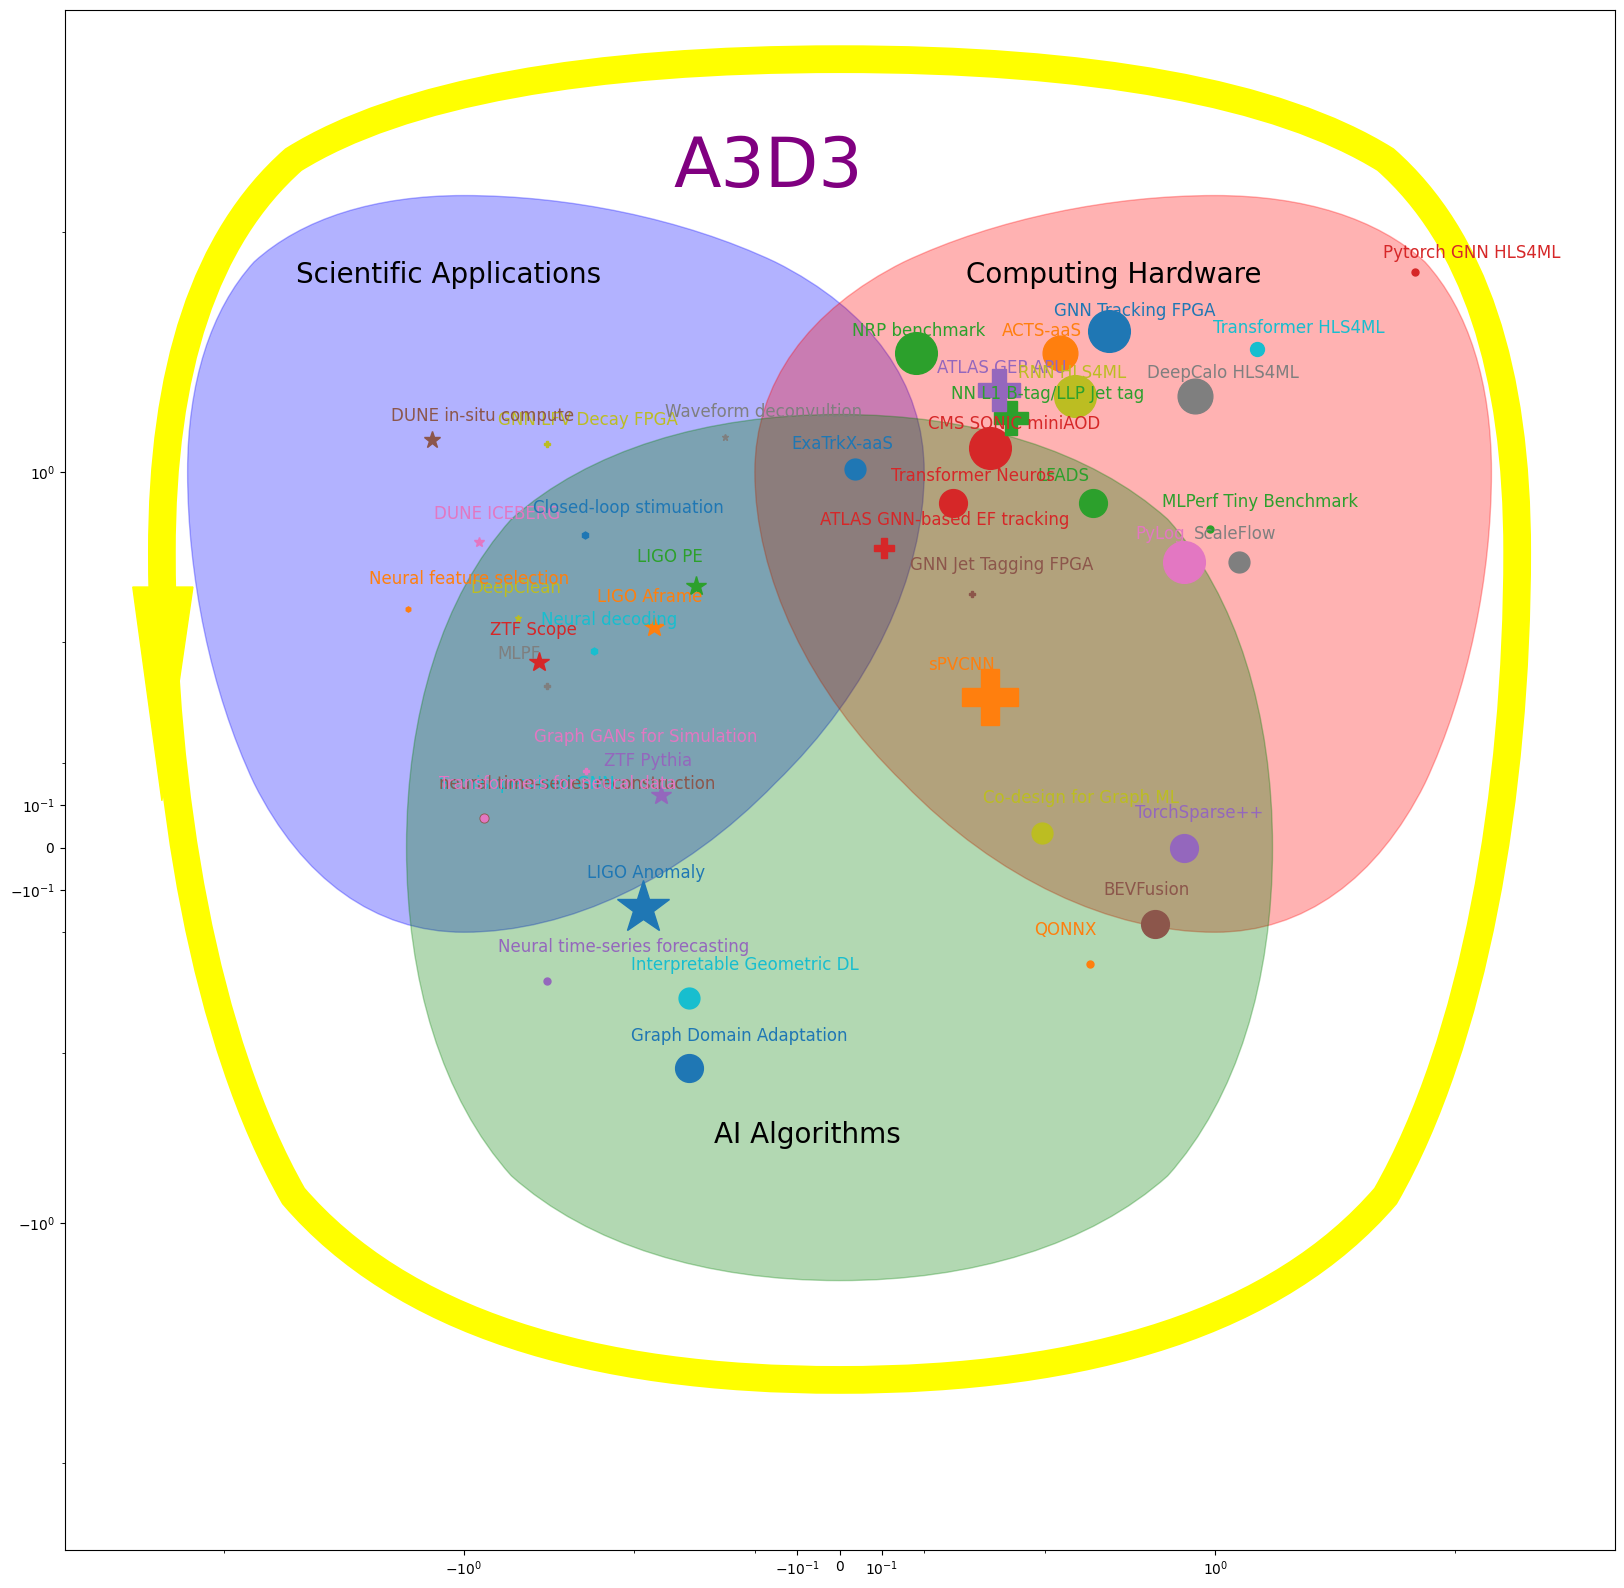

In [84]:
plot(projects)